# Single Photon Counting Test

## Imports

In [1]:
import h5py
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import timeit

In [2]:
import pycentroids

In [3]:
help(pycentroids.find_photons)

Help on function find_photons in module pycentroids.pycentroids:

find_photons(images, threshold=200, box=2, pixel_photon=10, overlap_max=0, sum_min=800, sum_max=1250, store_pixels='none')



## Load test data

In [4]:
!test -f image040.h5 || curl -o image040.h5 https://centroids-data.s3.amazonaws.com/images.h5

In [5]:
data = np.asarray(h5py.File('images.h5', 'r')['data'])

In [6]:
data.shape

(40, 1612, 3304)

In [7]:
#large_data = data.copy()
#for i in range(50):
#    large_data = np.concatenate((large_data, data))

In [8]:
#large_data.shape

## Call the fast code for single photon counting

In [9]:
#timeit.timeit("centroids.find_photons(large_data, 400, 2, store_pixels='none')", globals=globals(), number=1)

In [10]:
df, out = pycentroids.find_photons(data, 400, 2, store_pixels='sorted')

In [11]:
df.shape

(862, 47)

In [12]:
out.shape

(40, 1612, 3304)

In [13]:
df = df[df['Fit Outcome'] < 4]
df.shape

(815, 47)

In [14]:
list(df.columns)

['Pixel X',
 'Pixel Y',
 'COM X',
 'COM Y',
 'COR COM X',
 'COR COM Y',
 'Int',
 'Bgnd',
 'Overlap',
 'Fit X',
 'Fit Y',
 'Fit Bgnd',
 'Fit Amp',
 'Fit Sigma',
 'Fit Err X',
 'Fit Err Y',
 'Fit Err Bgnd',
 'Fit Err Amp',
 'Fit Err Sigma',
 'Fit Fnorm',
 'Fit Outcome',
 'Fit StdErr',
 'Pixel 0',
 'Pixel 1',
 'Pixel 2',
 'Pixel 3',
 'Pixel 4',
 'Pixel 5',
 'Pixel 6',
 'Pixel 7',
 'Pixel 8',
 'Pixel 9',
 'Pixel 10',
 'Pixel 11',
 'Pixel 12',
 'Pixel 13',
 'Pixel 14',
 'Pixel 15',
 'Pixel 16',
 'Pixel 17',
 'Pixel 18',
 'Pixel 19',
 'Pixel 20',
 'Pixel 21',
 'Pixel 22',
 'Pixel 23',
 'Pixel 24']

In [15]:
df

,Pixel X,Pixel Y,COM X,COM Y,COR COM X,COR COM Y,Int,Bgnd,Overlap,Fit X,...,Pixel 15,Pixel 16,Pixel 17,Pixel 18,Pixel 19,Pixel 20,Pixel 21,Pixel 22,Pixel 23,Pixel 24
0,619.0,866.0,619.214090,865.863346,619.212667,865.862500,1097.666667,160.733333,0.0,619.122255,...,1.266667,1.266667,0.266667,0.266667,0.266667,-0.733333,-3.733333,-4.733333,-6.733333,-11.733333
1,216.0,872.0,216.055261,872.041864,216.055000,872.040333,1194.333333,157.266667,0.0,216.116087,...,0.733333,0.733333,-1.266667,-1.266667,-1.266667,-1.266667,-1.266667,-2.266667,-3.266667,-4.266667
4,672.0,872.0,672.156154,872.423454,672.155833,872.421667,1088.666667,159.733333,0.0,672.110202,...,1.266667,0.266667,0.266667,0.266667,-0.733333,-0.733333,-2.733333,-3.733333,-4.733333,-5.733333
6,470.0,873.0,470.541635,872.751325,470.540833,872.750667,880.666667,157.933333,0.0,470.497155,...,2.066667,1.066667,0.066667,0.066667,-0.933333,-1.933333,-2.933333,-3.933333,-4.933333,-4.933333
7,592.0,873.0,592.514140,872.834412,592.513333,872.833167,978.333333,161.066667,0.0,592.403372,...,0.933333,-1.066667,-1.066667,-1.066667,-3.066667,-5.066667,-5.066667,-6.066667,-7.066667,-14.066667
8,706.0,873.0,705.961460,872.611562,705.959667,872.611333,986.000000,160.800000,0.0,705.852315,...,3.200000,2.200000,1.200000,-1.800000,-1.800000,-5.800000,-6.800000,-7.800000,-8.800000,-10.800000
9,716.0,873.0,716.022247,872.668521,716.022000,872.668167,899.000000,159.800000,0.0,715.903819,...,2.200000,2.200000,0.200000,0.200000,0.200000,-2.800000,-3.800000,-4.800000,-9.800000,-9.800000
10,638.0,874.0,637.855401,874.290070,637.855167,874.289667,1148.000000,159.600000,0.0,637.768384,...,2.400000,-0.600000,-1.600000,-2.600000,-2.600000,-3.600000,-3.600000,-4.600000,-5.600000,-6.600000
11,609.0,891.0,608.968539,890.853857,608.967000,890.853333,985.333333,162.266667,0.0,608.827919,...,0.733333,0.733333,-0.266667,-0.266667,-1.266667,-4.266667,-5.266667,-5.266667,-6.266667,-16.266667
12,609.0,896.0,609.510873,895.555210,609.509667,895.554500,1180.333333,157.066667,0.0,609.442386,...,0.933333,0.933333,-0.066667,-0.066667,-0.066667,-1.066667,-2.066667,-3.066667,-4.066667,-8.066667


## Plot the results 
### Whole image

<IPython.core.display.Javascript object>


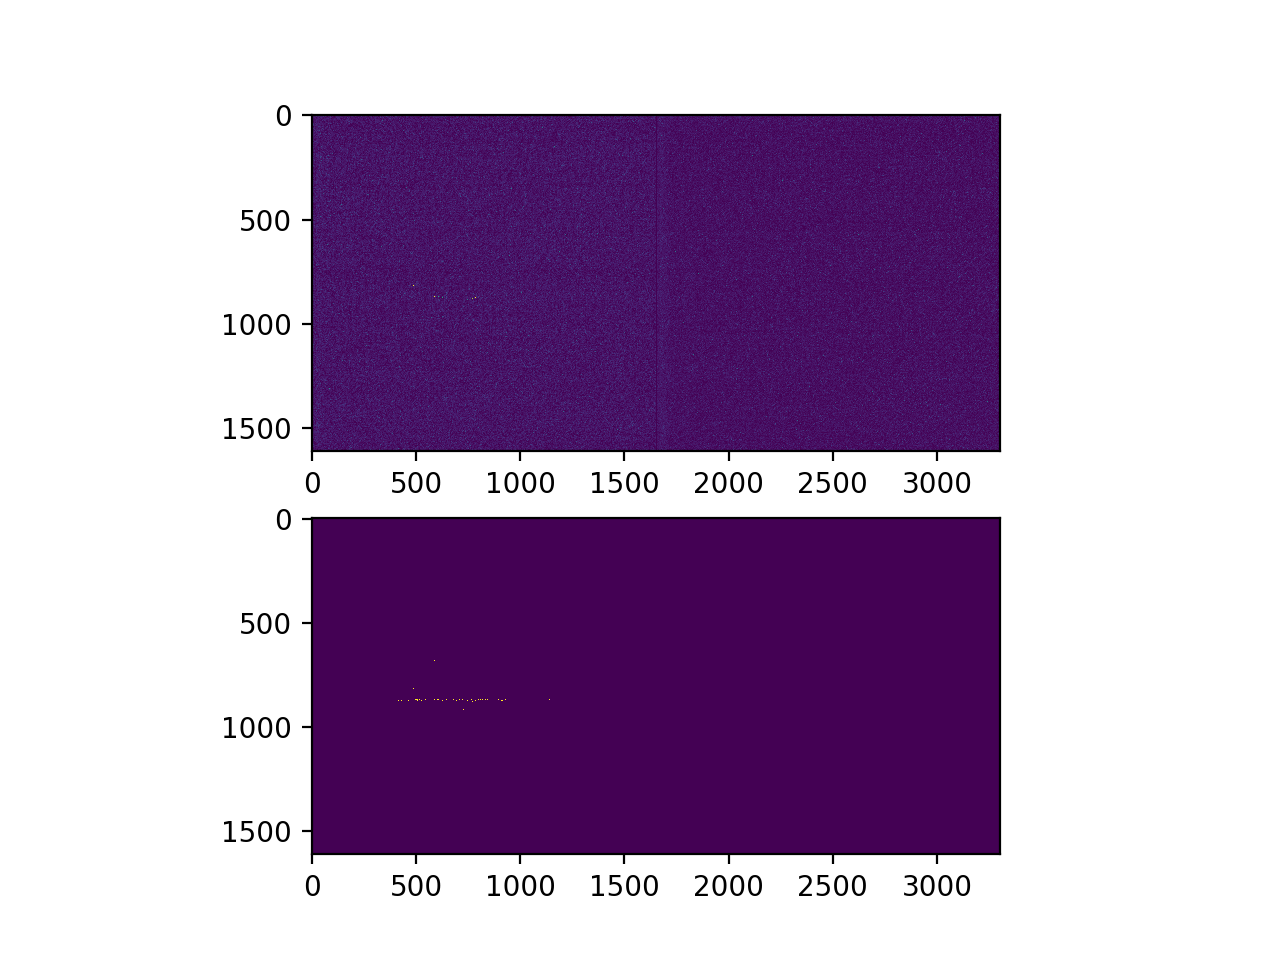

In [16]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1], vmin=150, vmax=300)
ax[1].imshow(out[-1]>0)

## Selected part of the image

<IPython.core.display.Javascript object>


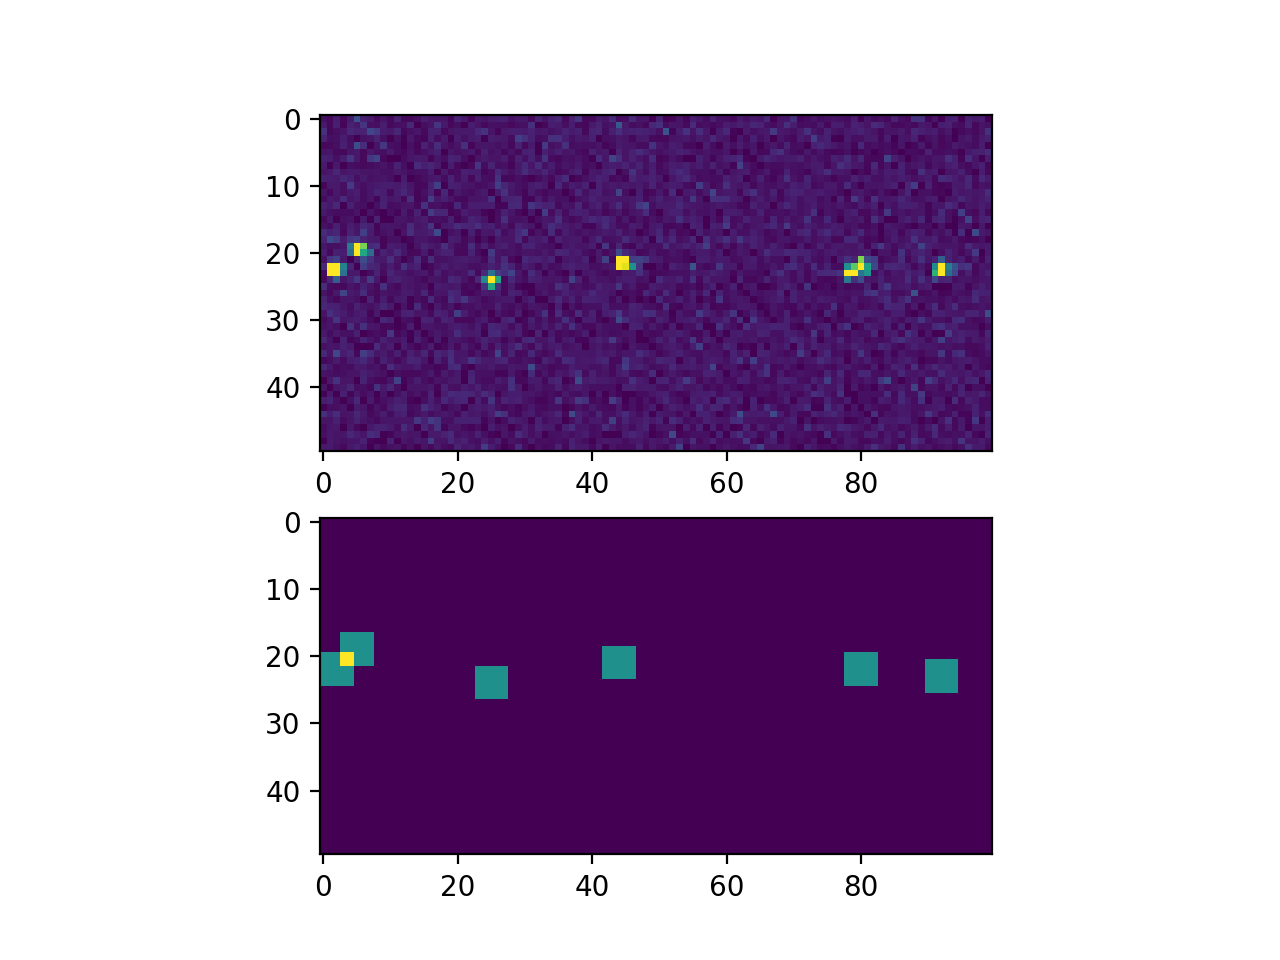

In [17]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1,850:900,600:700], vmin=150, vmax=300)
ax[1].imshow(out[-1,850:900,600:700] & 0xFF)

<IPython.core.display.Javascript object>


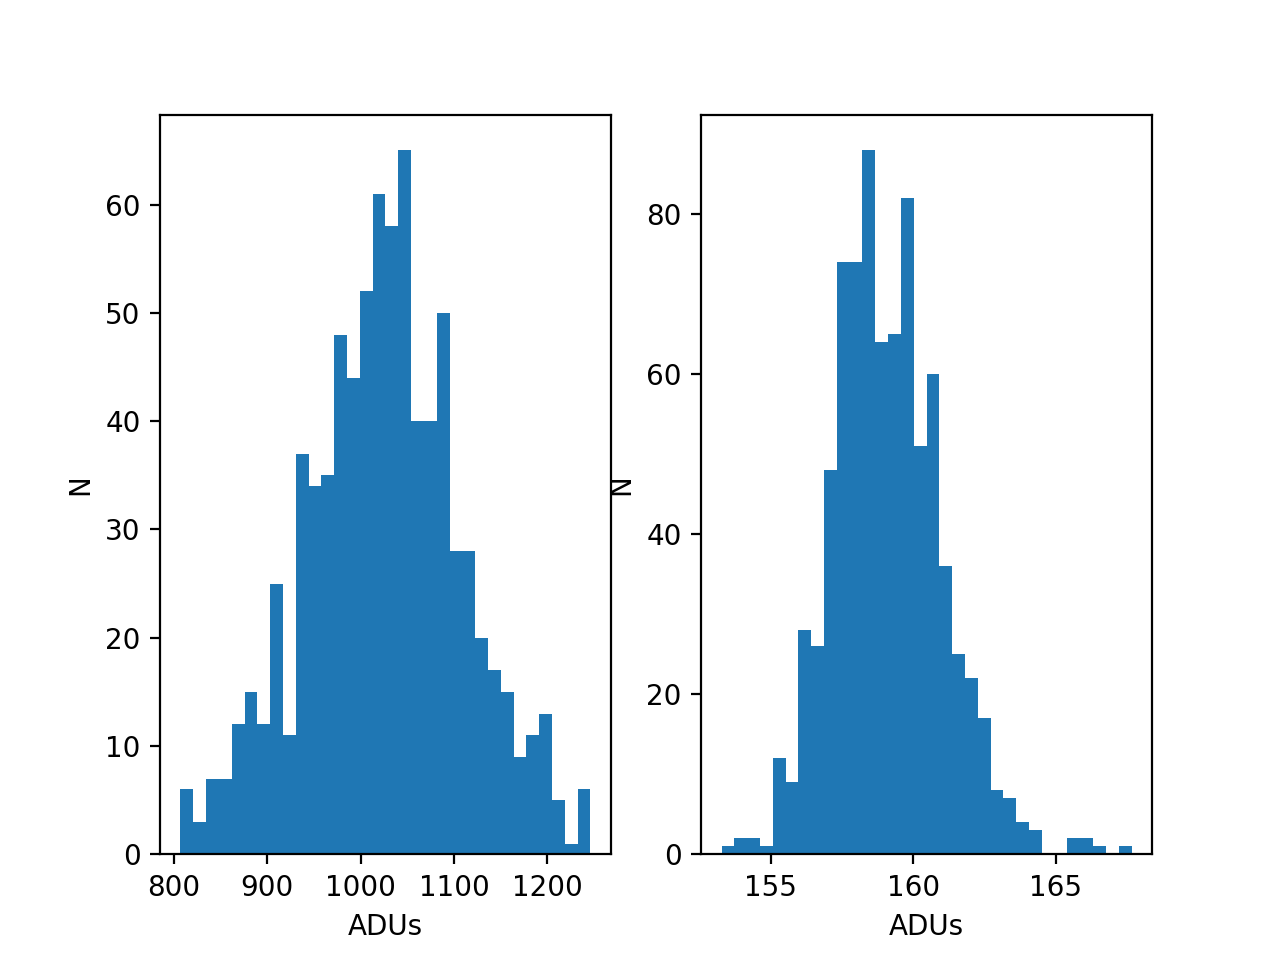

Text(0.5, 0, 'ADUs')

In [18]:
fig, ax = plt.subplots(1,2)
ax[0].hist(df['Int'], bins=32)
ax[0].set_ylabel('N')
ax[0].set_xlabel('ADUs')
ax[1].hist(df['Bgnd'], bins=32)
ax[1].set_ylabel('N')
ax[1].set_xlabel('ADUs')

In [19]:
xfrac = df['COM X'] - np.asarray(df['COM X'], dtype=int)
yfrac = df['COM Y'] - np.asarray(df['COM Y'], dtype=int)
xfrac_fit = df['Fit X'] - np.asarray(df['Fit X'], dtype=int)
yfrac_fit = df['Fit Y'] - np.asarray(df['Fit Y'], dtype=int)

<IPython.core.display.Javascript object>


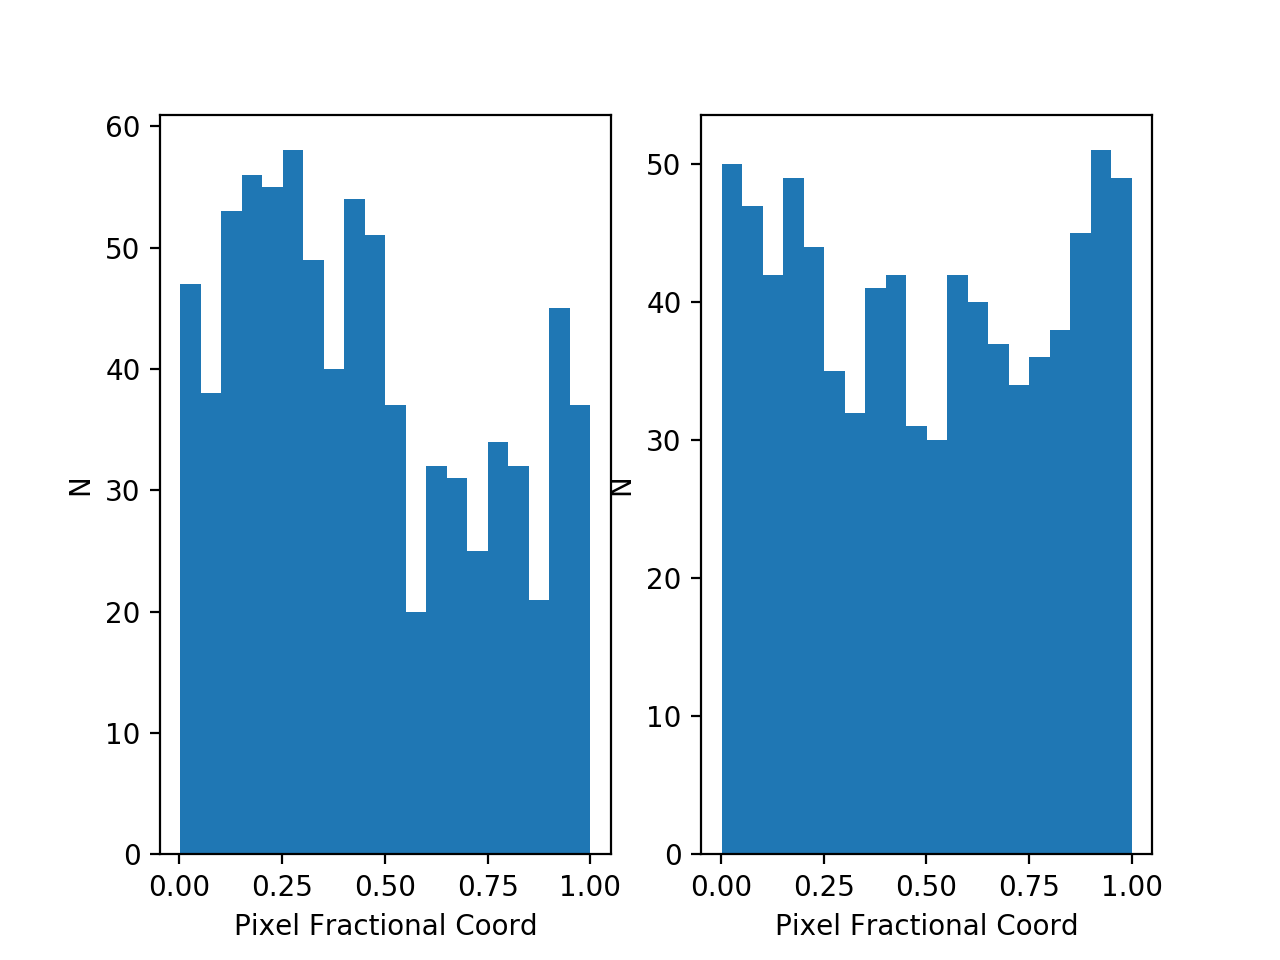

Text(0.5, 0, 'Pixel Fractional Coord')

In [20]:
fig, ax = plt.subplots(1,2)
ax[0].hist(xfrac_fit, bins=20)
ax[1].hist(yfrac_fit, bins=20)
ax[0].set_ylabel('N')
ax[0].set_xlabel('Pixel Fractional Coord')
ax[1].set_ylabel('N')
ax[1].set_xlabel('Pixel Fractional Coord')

<IPython.core.display.Javascript object>


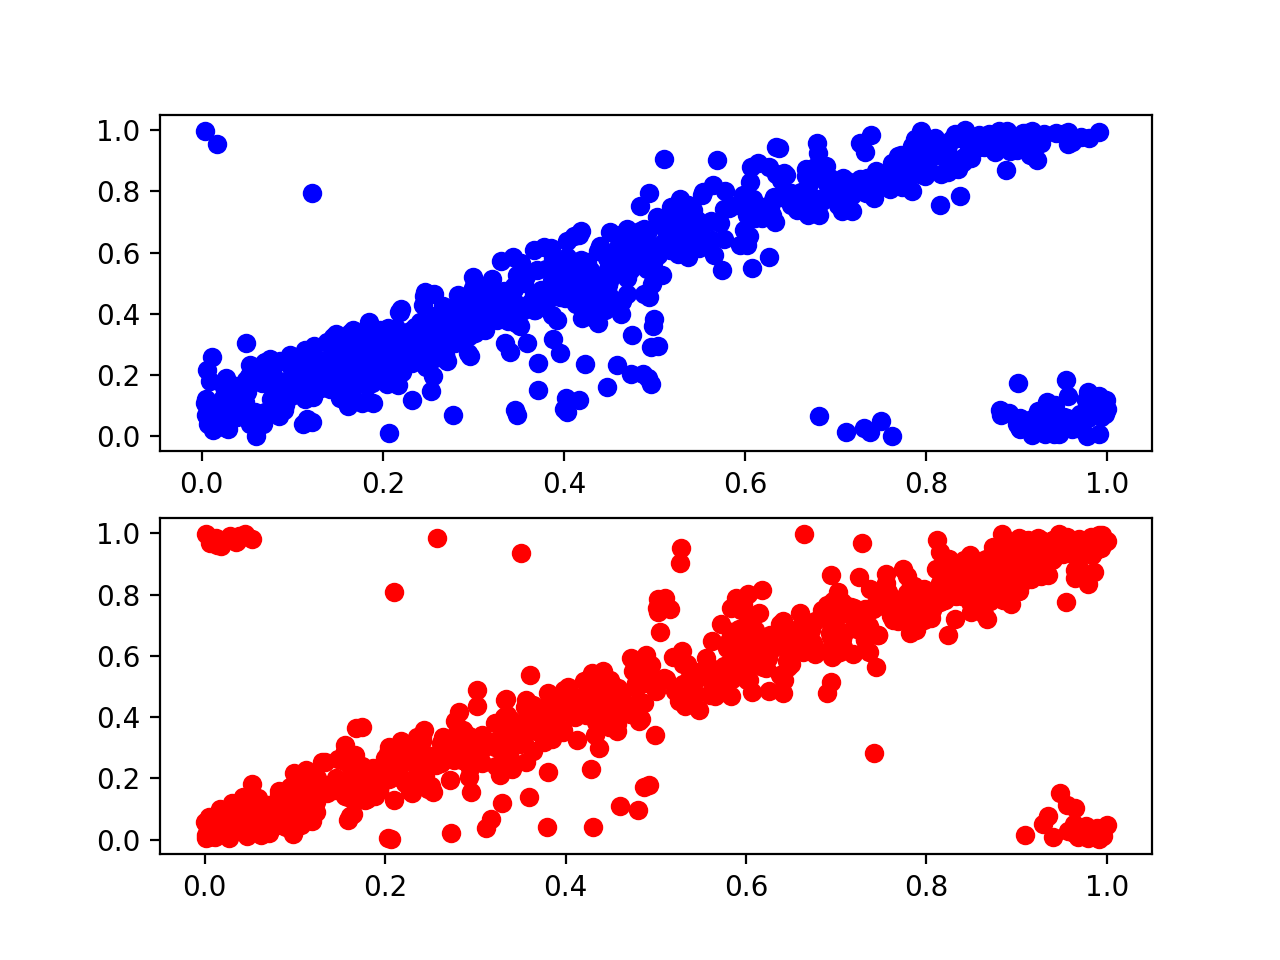

In [21]:
fig, ax = plt.subplots(2,1)
ax[0].plot(xfrac_fit, xfrac, 'bo')
ax[1].plot(yfrac_fit, yfrac, 'ro')

<IPython.core.display.Javascript object>


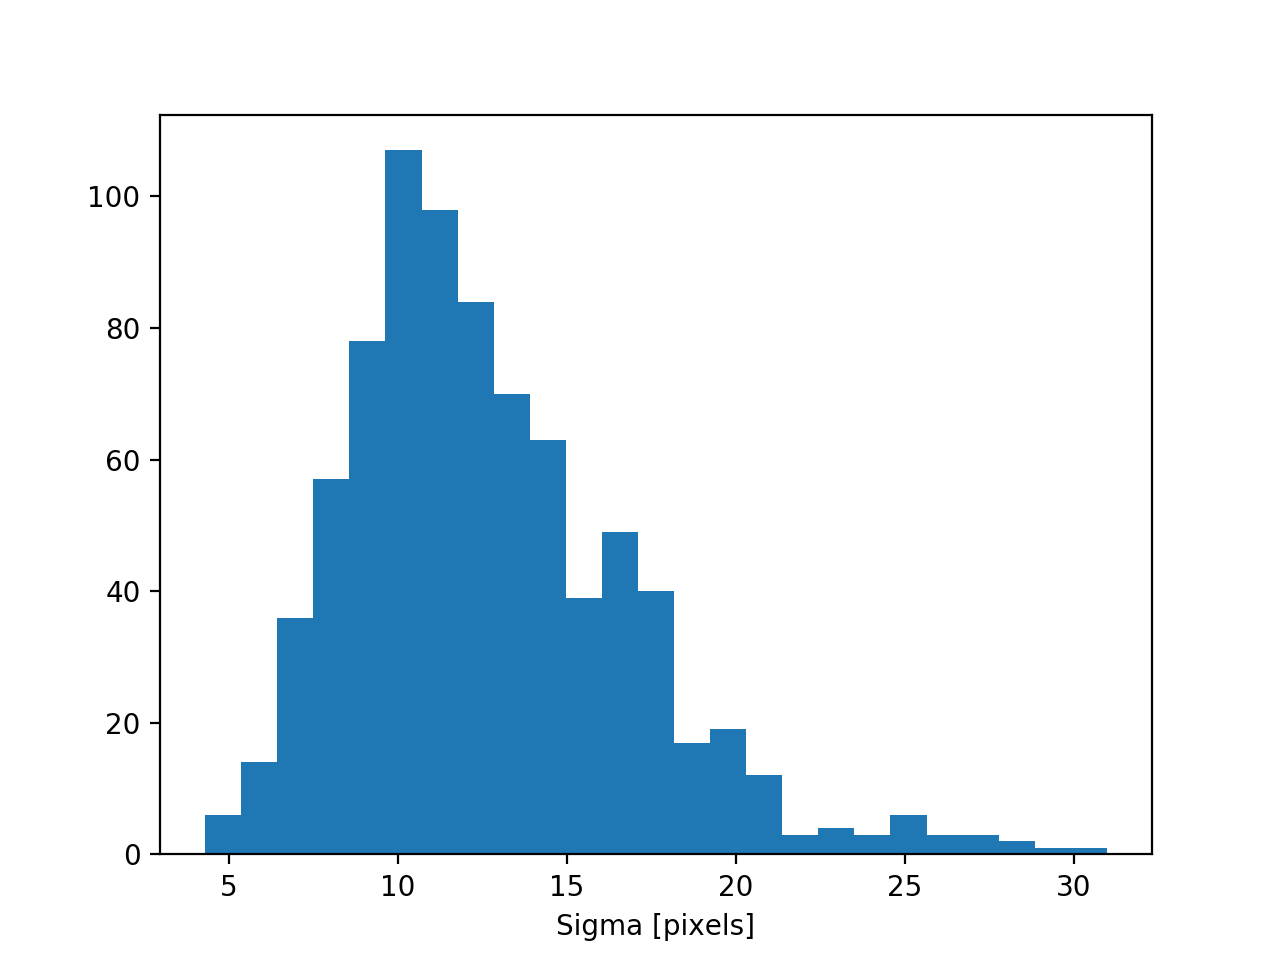

Text(0.5, 0, 'Sigma [pixels]')

In [22]:
fig, ax = plt.subplots(1,1)
ax.hist(df['Fit StdErr'], bins=25)
ax.set_xlabel('Sigma [pixels]')

<IPython.core.display.Javascript object>


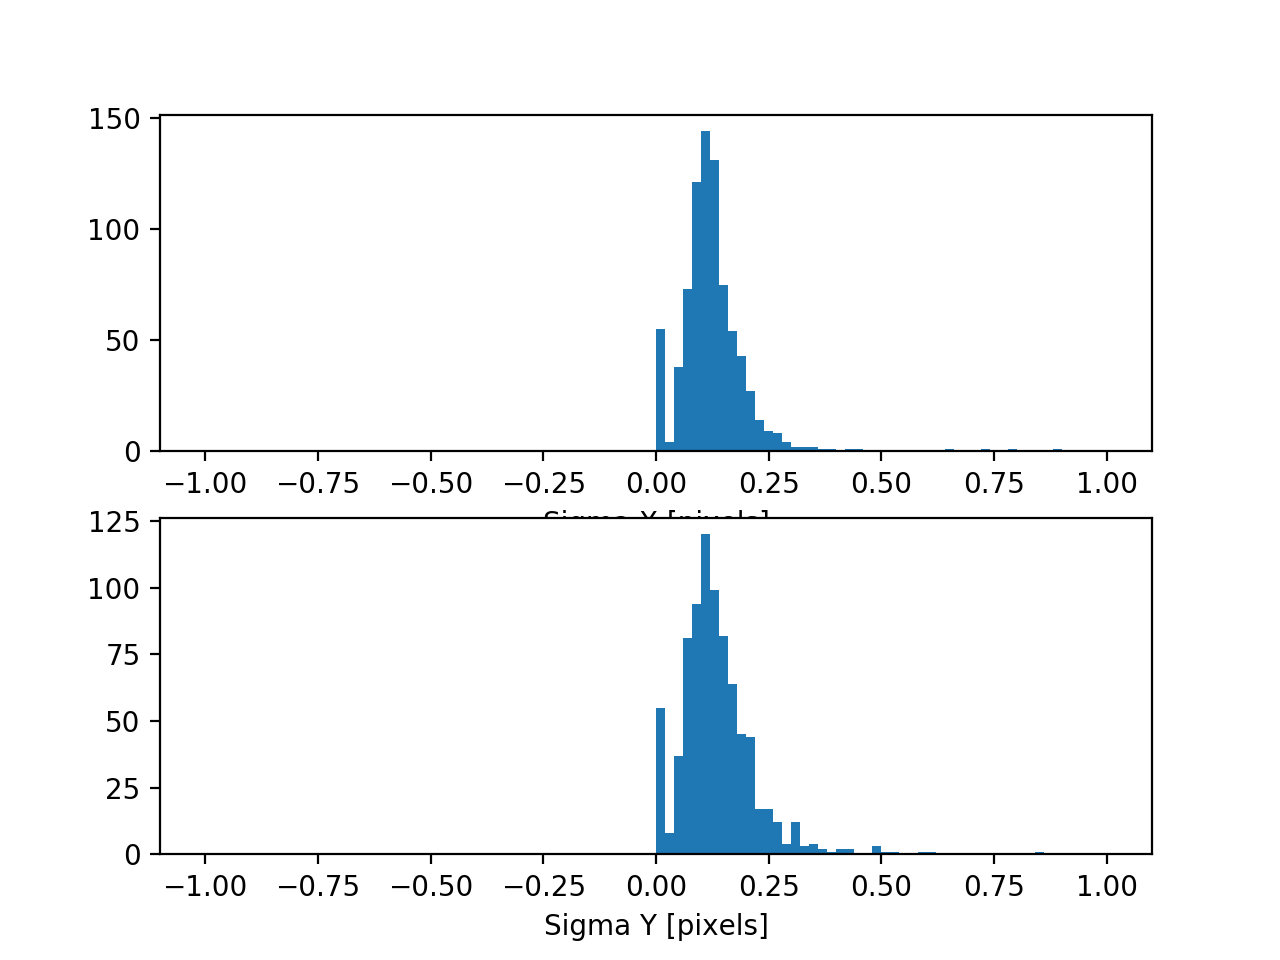

Text(0.5, 0, 'Sigma Y [pixels]')

In [23]:
fig, ax = plt.subplots(2,1)
ax[0].hist(df['Fit Err X'], bins=100, range=(-1,1))
ax[0].set_xlabel('Sigma X [pixels]')
ax[1].hist(df['Fit Err Y'], bins=100, range=(-1,1))
ax[1].set_xlabel('Sigma Y [pixels]')

In [24]:
pycentroids._pycentroids.__version__

'v0.1-47-gabf3a83+'